# Assignment 5.1

Name: Bhavin Palan

Date: 06/09/25

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 5.1.

Introducing notation for a parameter, state the following hypotheses in terms of the parameter
values and indicate whether it is a null hypothesis or an alternative hypothesis.

(a) The proportion of all adults in the UK who favor legalized gambling equals 0.50.


#### Answer a):
##### Null Hypothesis :=> The Proportion of all adults in UK who favor legalizing gambling is 50 %
##### Alternative Hypothesis :=> The Proportion of all adults in UK who favor legalizing gambling is not 50%.
##### Alternative Hypothesis :=> The Proportion of all adults in UK who favor legalizing gambling is Greater than 50%.
##### Alternative Hypothesis :=> The Proportion of all adults in UK who favor legalizing gambling is Less than 50%.

(b) The correlation for Australian adults between smoking (number of cigarettes per day) and blood pressure is positive.

#### Answer b):
##### Alternative Hypothesis :=> The correlation for Australian adults between smoking (number of cigarettes per day) and blood pressure is positive.
##### Null Hypothesis :=> There is no correlation for Australian adults between smoking (number of cigarettes per day) and blood pressure.

(c) The mean grade point average this year of all college graduates in the U.S. is the same for females and males.

#### Answer c):
##### Null Hypothesis :=> The mean grade point average this year of all college graduates in the U.S. is the same for females and males.
##### Alternative Hypothesis :=> The mean grade point average this year of all college graduates in the U.S. is the more for Females compare to Males.
##### Alternative Hypothesis :=> The mean grade point average this year of all college graduates in the U.S. is the more for Males compare to Females.
##### Alternative Hypothesis :=> The mean grade point average this year of all college graduates in the U.S. is not same for Males and Females.

## Problem 5.6.

Before a Presidential election, polls are taken in two swing states. The Republican candidate
was preferred by 59 of the 100 people sampled in state A and by 525 of 1000 sampled in state
B. Treat these as independent binomial samples, where the parameter $\pi$ is the population
proportion voting Republican in the state.


(a) If we can treat these polls as if the samples were random, use significance tests of $H_0$:
$\pi  = 0.50$ against $H_a:  \pi > 0.50$ to determine which state has greater evidence supporting a
Republican victory. Explain your reasoning.


**Answer a)**

Given that Polls shows that for State A, 59 of 100 People prefers Republican Candidate while for State B, 525 of 1000 People prefer Republican Candidate.

Null Hypothesis: People Favoring Republican Candidate is 50%.  $H_0$: $\pi  = 0.50$ 

Alternative Hypothesis; People Favoring Republican Candidate is more than 50% $H_a:  \pi > 0.50$ 

In [1]:
from statsmodels.stats.proportion import proportions_ztest

## State A
favorRepublican_a = 59
sampleSize_a = 100
ztest_a, pvalue_a = proportions_ztest(count=favorRepublican_a, nobs=sampleSize_a, value=0.5, alternative='larger')

## State B
favorRepublican_b = 525
sampleSize_b = 1000
ztest_b, pvalue_b = proportions_ztest(count=favorRepublican_b, nobs=sampleSize_b, value=0.5, alternative='larger')

print(f"State A has z-test= {ztest_a:.4f}, p-value = {pvalue_a:.4f}")
print(f"State B has z-test= {ztest_b:.4f}, p-value = {pvalue_b:.4f}")


State A has z-test= 1.8299, p-value = 0.0336
State B has z-test= 1.5831, p-value = 0.0567


**From above, p-value for State B is > 0.05 while for State A < 0.05. So State A shows strong evidence of people favoring Republican Candidates while State B doesn't even though Sample Size is high**

(b) Conduct a Bayesian analysis to answer the question in (a) by finding in each case the
posterior $P(\pi < 0.50)$, corresponding to the *P-* value in (a). Use beta(50, 50) priors, which
have standard deviation 0.05 and reflect the pollster’s strong prior belief that $\pi$ almost
surely is between 0.35 and 0.65. Explain any differences between conclusions.

`Your answer goes here`

In [5]:
from scipy.stats import beta

## State A
favorRepublican_a = 59
sampleSize_a = 100

## State B
favorRepublican_b = 525
sampleSize_b = 1000

## Prior Belief => 50,50 that people support republicans
alpha_prior, beta_prior = 50, 50

# Posterior parameters
alpha_posterior_a, beta_posterior_a = alpha_prior + favorRepublican_a, beta_prior + (sampleSize_a - favorRepublican_a)
alpha_posterior_b, beta_posterior_b = alpha_prior + favorRepublican_b, beta_prior + (sampleSize_b - favorRepublican_b)

# Posterior probabilities P(π > 0.5)
probability_a = 1 - beta.cdf(0.5, alpha_posterior_a, beta_posterior_a)
probability_b = 1 - beta.cdf(0.5, alpha_posterior_b, beta_posterior_b)

print(f"State A: P(> 0.5) = {probability_a:.4f}")
print(f"State B: P(> 0.5) = {probability_b:.4f}")


State A: P(> 0.5) = 0.8991
State B: P(> 0.5) = 0.9343


**From above, we can see that State B gives strong confidence compare to State A with Republican Lead**

## Problem 5.8.

For the `Students` data file at the text website, analyze political ideology.

(a) Test whether the population mean $\mu$ differs from 4.0, the moderate response. Report the
*P*-value, and interpret. Make a conclusion using $\alpha$ - level = 0.05.

`Your answer goes here`

In [14]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd
from IPython.display import display
from scipy import stats
import numpy as np


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Students.dat"
file_name = "Students.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_student = pd.read_csv(file_name, sep=r'\s+', engine='python')
    display(df_student.head())

    ## Drop missing values in the 'ideol' column
    ideology = df_student['ideol'].dropna()

    print(f""" 
    Null Hypothesis: Population Mean is 0.40 which is a Moderate Response. 
    
    Alternative Hypothesis: Population Mean is not 0.40 which is not a Moderate Response. 
    """)

    ## t-test against the null hypothesis mean of 4.0
    t_stat, p_value = stats.ttest_1samp(ideology, popmean=4.0)

    mean_ideology = ideology.mean()
    print(f"Mean: {mean_ideology:.3f}")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f""" 
                    --> Null Hypothesis is rejected 
              """)
    else:
        print(f""" 
                    --> Null Hypothesis is accepted 
              """)


else:
    print("File not found.")
    

File downloaded successfully.


,subject,gender,age,hsgpa,cogpa,dhome,dres,tv,sport,news,aids,veg,affil,ideol,relig,abor,affirm,life
0,1,0,32,2.2,3.5,0,5.0,3.0,5,0,0,0,2,6,2,0,0,1
1,2,1,23,2.1,3.5,1200,0.3,15.0,7,5,6,1,1,2,1,1,1,3
2,3,1,27,3.3,3.0,1300,1.5,0.0,4,3,0,1,1,2,2,1,1,3
3,4,1,35,3.5,3.2,1500,8.0,5.0,5,6,3,0,3,4,1,1,1,2
4,5,0,23,3.1,3.5,1600,10.0,6.0,6,3,0,0,3,1,0,1,0,2


 
    Null Hypothesis: Population Mean is 0.40 which is a Moderate Response. 
    
    Alternative Hypothesis: Population Mean is not 0.40 which is not a Moderate Response. 
    
Mean: 3.033
T-statistic: -4.577
P-value: 0.0000
 
                    --> Null Hypothesis is rejected 
              


(b) Construct the 95% confidence interval for $\mu$. Explain how results relate to those of the
test in (a).


**Answer Below:**

In [15]:
# Descriptive stats
ideology_mean = ideology.mean()
ideology_std = ideology.std()
size = len(ideology)
standard_error = ideology_std / np.sqrt(size)

# t critical value
t_critical = stats.t.ppf(0.975, df=size-1)  # two-tailed, 95% CI

# Confidence Interval
ci_lower = ideology_mean - t_critical * standard_error
ci_upper = ideology_mean + t_critical * standard_error

print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

95% Confidence Interval: (2.611, 3.456)


**Since from above we are 95% confident that the True average political ideology for students is between 2.61 and 3.45. 
The whole range is below 4 and so it rejects the null hypothesis which was also proved in section a.**

## Problem 5.10.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year
from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the
original observation. Stating any assumptions including the conceptual population of interest,
use a *t* test with the data in the Sheep data file at the text website to compare mean weights
of the sheep that survived and did not survive. Interpret the *P*-value.

`Your answer goes here`

## Problem 5.11.

Use descriptive statistics and significance tests to compare the population mean political ideology for each pair of groups in Table 5.2 using the `Polid` data file. Summarize results using
*P*-values and using a non-technical explanation.

`Your answer goes here`

In [19]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd
from IPython.display import display
from scipy import stats
import numpy as np


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Polid.dat"
file_name = "Polid.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_Polid = pd.read_csv(file_name, sep=r'\s+', engine='python')
    display(df_Polid.head())

else:
    print("File not found.")

File downloaded successfully.


,race,ideology
1,hispanic,1
2,hispanic,1
3,hispanic,1
4,hispanic,1
5,hispanic,1


In [22]:
## Descriptive Statistics as below
df_Polid.describe(include="all")

,race,ideology
count,2575,2575.000000
unique,3,NaN
top,white,NaN
freq,1835,NaN
mean,NaN,4.107961
std,NaN,1.424613
min,NaN,1.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000


In [24]:
import scipy.stats as stats
import itertools
import pandas as pd

# Drop rows with missing values in required columns
df_Polid = df_Polid.dropna(subset=['ideology', 'race'])

# Get descriptive statistics
desc_stats = df_Polid.groupby('race')['ideology'].agg(['mean', 'std', 'count'])
print("Descriptive Statistics by Race:\n", desc_stats)

# Get unique races
races = df_Polid['race'].unique()

# Pairwise t-tests
print("\nPairwise t-tests:")
for race1, race2 in itertools.combinations(races, 2):
    group1 = df_Polid[df_Polid['race'] == race1]['ideology']
    group2 = df_Polid[df_Polid['race'] == race2]['ideology']
    
    # Perform independent two-sample t-test
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    
    print(f"{race1} vs {race2}: t = {t_stat:.3f}, p = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not significant)'}")


Descriptive Statistics by Race:
               mean       std  count
race                               
black     3.816712  1.298165    371
hispanic  4.089431  1.339258    369
white     4.170572  1.458553   1835

Pairwise t-tests:
hispanic vs black: t = 2.812, p = 0.0050 (Significant)
hispanic vs white: t = -1.046, p = 0.2961 (Not significant)
black vs white: t = -4.686, p = 0.0000 (Significant)


## Problem 5.14 (a).

The `Income` data file at the book’s website shows annual incomes in thousands of dollars for
subjects in three racial-ethnic groups in the U.S.

(a) Stating all assumptions including the relative importance of each, show all steps of a significance test for comparing population mean incomes of Blacks and Hispanics. Interpret.


`Your answer goes here`

In [16]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd
from IPython.display import display
from scipy import stats
import numpy as np


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Income.dat"
file_name = "Income.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_Income = pd.read_csv(file_name, sep=r'\s+', engine='python')
    display(df_Income.head())

else:
    print("File not found.")

File downloaded successfully.


,income,education,race
0,16,10,B
1,18,7,B
2,26,9,B
3,16,11,B
4,34,14,B


In [18]:
import pandas as pd
from scipy.stats import ttest_ind

# Filter data
b_income = df_Income[df_Income['race'] == 'B']['income']
h_income = df_Income[df_Income['race'] == 'H']['income']

# Perform Welch's t-test (assumes unequal variances)
t_stat, p_value = ttest_ind(b_income, h_income, equal_var=False)

# Summary
black_mean = b_income.mean()
hispanic_mean = h_income.mean()
black_size = len(b_income)
hispanic_size = len(h_income)

print(f"Mean (Black): {black_mean:.2f}K, n = {black_size}")
print(f"Mean (Hispanic): {hispanic_mean:.2f}K, n = {hispanic_size}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")


Mean (Black): 27.75K, n = 16
Mean (Hispanic): 31.00K, n = 14
T-statistic: -0.681
P-value: 0.5013


**Since P value is much higher than 0.05 signifance value, we fail to reject null hypothesis. Meaning there is no statistical significant difference in income of Black vs Hispanic in the Sample Dataset.** 

## Problem 5.15.

A recent report $\text{}^{39}$ estimated mean adult heights in the U.S. of 175.4 *cm* (69.1 inches) for men
and 161.7 *cm* (63.7 inches) for women, with standard deviation about 7 *cm* for each group. For
all finishers in the Boston Marathon since 1972, the time to finish has a mean of 221 minutes
for men and 248 minutes for women, each with a standard deviation of about 40 minutes.
According to the effect size, is the difference between men and women greater for height or for
marathon times? Explain.

`Your answer goes here`

In [26]:
def func_cohen_d(mean_group1, mean_group2, stddev):
    """Calculate Cohen's d for two means with equal standard deviation"""
    return abs(mean_group1 - mean_group2) / stddev

## Height data
men_height_mean = 175.4
women_height_mean = 161.7
height_stddev = 7

## Marathon time data
men_marathon_time = 221
women_marathon_time = 248
marathon_time_stddev = 40

# Calculate effect sizes
cohen_d_height = func_cohen_d(men_height_mean, women_height_mean, height_stddev)
cohen_d_marathon = func_cohen_d(men_marathon_time, women_marathon_time, marathon_time_stddev)

# Print results
print(f"Cohen's d for height: {cohen_d_height:.2f}")
print(f"Cohen's d for marathon time: {cohen_d_marathon:.2f}")


Cohen's d for height: 1.96
Cohen's d for marathon time: 0.68


**It indicates that the gender difference has greater impact on height compare to marathon times**

## Problem 5.17.

Ideally, results of a statistical analysis should not depend greatly on a single observation. In a
sensitivity study, we re-do the analysis after deleting an outlier from the data set or changing its
value to a more typical value and checking whether results change much. For the anorexia data
analysis in Section 5.3.2, the weight change of 20.9 pounds for the cb group was a severe outlier.
Suppose this observation was actually 2.9 pounds but recorded incorrectly. Find the *P*-value
for testing $H_0: \mu1 = \mu2$ against $H_a: \mu1 \ne \mu2$ with and without that observation. Summarize its
influence.

`Your answer goes here`

In [41]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd
from IPython.display import display
from scipy import stats
import numpy as np
from io import StringIO


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Anorexia.dat"
file_name = "Anorexia.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_Anorexia = pd.read_csv(file_name, sep=r'\s+', engine='python')
    display(df_Anorexia.head())

else:
    print("File not found.")

File downloaded successfully.


,subject,therapy,before,after
0,1,cb,80.5,82.2
1,2,cb,84.9,85.6
2,3,cb,81.5,81.4
3,4,cb,82.6,81.9
4,5,cb,79.9,76.4


In [43]:
import pandas as pd
from scipy.stats import ttest_ind



df_Anorexia['weightChange'] = df_Anorexia['after'] - df_Anorexia['before']


cb = df_Anorexia[df_Anorexia['therapy'] == 'cb'].copy()
other = df_Anorexia[df_Anorexia['therapy'] != 'cb'].copy()


t_stat_orig, p_val_orig = ttest_ind(cb['weightChange'], other['weightChange'], equal_var=False)

print(f"Original P-value: {p_val_orig:.5f}")


outlier_index = cb[cb['weightChange'] == 20.9].index
df_Anorexia.loc[outlier_index, 'weightChange'] = 2.9


cb_corr = df_Anorexia[df_Anorexia['therapy'] == 'cb']['weightChange']
other_corr = df_Anorexia[df_Anorexia['therapy'] != 'cb']['weightChange']


t_stat_corr, p_val_corr = ttest_ind(cb_corr, other_corr, equal_var=False)

print(f"Corrected P-value: {p_val_corr:.5f}")


if p_val_orig != p_val_corr:
    print(f"The outlier had a significant influence on the test result.")
else:
    print(f"The outlier did not materially affect the test result.")


### This portion of the Code was referred from ChatGPT for understanding and re-using most of this.

Original P-value: 0.82893
Corrected P-value: 0.82893
The outlier did not materially affect the test result.


## Problem 5.19.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017 of 1178 females said *yes*, and 703 of 945 males said *yes*. Test that the population proportions are equal for females and males. Report and interpret the *P*-value.

`Your answer goes here`

**Null Hypothesis: Proportion of Females believe in Life after Death is equal to Proportion of Male believe in Life After Death**

**Alternative Hypothesis: Proportion of Females believe in Life after Death is not equal to Proportion of Male believe in Life After Death**

In [27]:
from scipy.stats import norm
import numpy as np


female_lifeAfterDeath, female_total = 1017, 1178  
male_lifeAfterDeath, male_total = 703, 945    


female_proportion = female_lifeAfterDeath / female_total
male_proportion = male_lifeAfterDeath / male_total

## Pooled proportion under H0
pooled_proportion = (female_lifeAfterDeath + male_lifeAfterDeath) / (female_total + male_total)

## Standard error
standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/female_total + 1/male_total))

## Z statistic
z_stat = (female_proportion - male_proportion) / standard_error

## Two-tailed P-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4g}")


Z-statistic: 6.9726
P-value: 3.111e-12


**Since P-Value is very low compare to 0.05, null hypothesis is rejected. Meaning proportion of female believing in Life after death is higher compare to male**

## Problem 5.23.

Use the `Happy` data file from the 2018 General Social Survey at the text website to form a
contingency table that cross classifies happiness with gender. For $ H_0 $: independence between
happiness and gender:

(a) Conduct and interpret the chi-squared test.

`Your answer goes here`

In [28]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd
from IPython.display import display
from scipy import stats
import numpy as np


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Happy.dat"
file_name = "Happy.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_Happy = pd.read_csv(file_name, sep=r'\s+', engine='python')
    display(df_Happy.head())

else:
    print("File not found.")

File downloaded successfully.


,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male


In [35]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.contingency_tables import Table2x2
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic


df_Happy = df_Happy.dropna(subset=['happiness', 'gender'])

cont_table = pd.crosstab(df_Happy['happiness'], df_Happy['gender'])

# Perform chi-squared test of independence
chisquare, pvalue, degree_freedom, expected = stats.chi2_contingency(cont_table)
print(f"1. Chi-square statistic: {chisquare:.4f}")
print(f"2. Degrees of freedom: {degree_freedom}")
print(f"3. P-value: {pvalue:.4f}")

# Conclusion
if chisquare_result.pvalue < 0.05:
    print("\n => Null Hypothesis Rejected. Happiness and gender are dependent on each other.")
else:
    print("\n => Fail to reject Null Hypothesis. Happiness and gender are independent on each other.")

1. Chi-square statistic: 0.9165
2. Degrees of freedom: 2
3. P-value: 0.6324

 => Fail to reject Null Hypothesis. Happiness and gender are independent on each other.


(b) Show the estimated expected frequencies and standardized residuals, and form a mosaic
plot. Explain how they are consistent with the result of the chi-squared test.

`Your answer goes here`


Expected Frequencies:
 gender         female        male
happiness                        
1          347.294118  300.705882
2          640.457516  554.542484
3          160.248366  138.751634

Standardized Residuals:
 gender       female      male
happiness                    
1          0.306178 -0.329042
2          0.060950 -0.065502
3         -0.572589  0.615348


<Figure size 800x600 with 0 Axes>

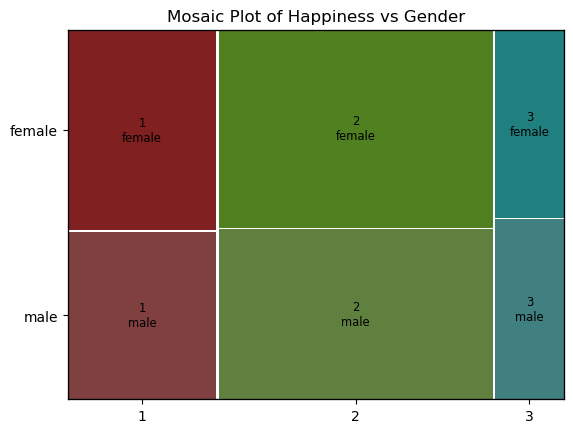

In [38]:

expected_df = pd.DataFrame(expected, index=cont_table.index, columns=cont_table.columns)
print("\nExpected Frequencies:\n", expected_df)

# Standardized residuals = (observed - expected) / sqrt(expected)
std_residuals = (cont_table - expected_df) / np.sqrt(expected_df)
print("\nStandardized Residuals:\n", std_residuals)

# Plot mosaic plot
plt.figure(figsize=(8,6))
mosaic(df_Happy, ['happiness', 'gender'], title='Mosaic Plot of Happiness vs Gender')
plt.show()

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{39}$ See www.cdc.gov/nchs/data/nhsr/nhsr122-508.pdf and https://doi.org/10.1371/journal.pone.  